# Using Pandas with Large Dataset

#### Tips for reducing memory usage by up to 90 %

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Read csv into data and print top 10 records
data = pd.read_csv('../Data/game_logs.csv')
data.head(10)

E:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (12,13,14,15,19,20,81,83,85,87,93,94,95,96,97,98,99,100,105,106,108,109,111,112,114,115,117,118,120,121,123,124,126,127,129,130,132,133,135,136,138,139,141,142,144,145,147,148,150,151,153,154,156,157,160) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,18710504,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,18710505,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,18710506,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,18710508,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,18710509,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y
5,18710511,0,Thu,CH1,na,2,CL1,na,4,18,...,Ezra Sutton,5.0,carlj102,Jim Carleton,3.0,bassj101,John Bass,6.0,NaN,Y
6,18710513,0,Sat,WS3,na,2,CL1,na,5,12,...,Ezra Sutton,5.0,white104,Elmer White,9.0,bassj101,John Bass,6.0,NaN,Y
7,18710513,0,Sat,CH1,na,3,FW1,na,2,14,...,Ed Mincher,7.0,donnp101,Pete Donnelly,8.0,kellb105,Bill Kelly,9.0,NaN,Y
8,18710515,0,Mon,WS3,na,3,FW1,na,3,6,...,Ed Mincher,7.0,donnp101,Pete Donnelly,9.0,kellb105,Bill Kelly,8.0,NaN,Y
9,18710516,0,Tue,TRO,na,2,BS1,na,3,29,...,Fred Cone,7.0,spala101,Al Spalding,1.0,jacks101,Sam Jackson,8.0,HTBF,Y


In [3]:
# Return high level information about data
data.info(memory_usage = 'deep')

# Return memory usage(MB) for each columns
data.memory_usage(deep = True).head()/1024**2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171907 entries, 0 to 171906
Columns: 161 entries, date to acquisition_info
dtypes: float64(77), int64(6), object(78)
memory usage: 860.5 MB


Index             0.000076
date              1.311546
number_of_game    1.311546
day_of_week       9.836597
v_name            9.836597
dtype: float64

### Internal representation of dataframe

1. BlockManager class is resposible for maintaining the mapping between the row, column indexes, and actual blocks.
2. Storing data into memory separated by data type (Int, String, float)

![data type memory](../Data/Notebook_images/memory_type.png)

In [4]:
# Checking avg memory usage for data type
for dtype in ['float64', 'int64','object']:
    selected_dtype = data.select_dtypes(include = dtype)
    mean_usage = selected_dtype.memory_usage(deep=True).mean() / (1024 ** 2)
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage))

Average memory usage for float64 columns: 1.29 MB
Average memory usage for int64 columns: 1.12 MB
Average memory usage for object columns: 9.51 MB


In [5]:
# Create a function to be calculating memory usage
def get_usage(obj):
    if isinstance(obj, pd.DataFrame):
        usage = obj.memory_usage(deep=True).sum()
    else:
        usage = obj.memory_usage(deep=True)
    return "{:03.2f} MB".format(usage / (1024**2))

In [6]:
# Convert int64 to int8
obj = data.select_dtypes(include = 'int64')
print(get_usage(obj))
obj_int = obj.apply(pd.to_numeric, downcast='unsigned')
print(get_usage(obj_int))

compare_ints = pd.concat([obj.dtypes, obj_int.dtypes], axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)


7.87 MB
1.48 MB


,before,after
uint8,NaN,5.0
uint32,NaN,1.0
int64,6.0,NaN


In [7]:
# Convert float64 to float32
obj = data.select_dtypes(include = 'float64')
print(get_usage(obj))
obj_f = obj.apply(pd.to_numeric, downcast='float')
print(get_usage(obj_f))

compare_ints = pd.concat([obj.dtypes, obj_f.dtypes], axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)


100.99 MB
50.49 MB


,before,after
float32,NaN,77.0
float64,77.0,NaN


In [8]:
# Calculated the memory we reduced by down grade int and float
data_opt = data.copy()
data_opt[obj_int.columns] = obj_int
data_opt[obj_f.columns] = obj_f
print("Original memory usage: ", get_usage(data))
print("After converting int and float memory usage: ", get_usage(data_opt))


Original memory usage:  860.50 MB
After converting int and float memory usage:  803.61 MB


### Optimizing object types using categoricals

1. Pandas uses a separate mapping dictionary that masp the integer values to the raw ones.
2. This arrangement is useful whenever a column contains a limited set of values
3. Converting "Category" type to 'Int", pandas uses the most space efficient Int subtype that can repesent all of the unique values 

![Categorical to Int](../Data/Notebook_images/factorize.png)

In [9]:
data_obj = data.select_dtypes(include = 'object')
data_obj.describe()

,day_of_week,v_name,v_league,h_name,h_league,day_night,completion,forefeit,protest,park_id,...,h_player_6_id,h_player_6_name,h_player_7_id,h_player_7_name,h_player_8_id,h_player_8_name,h_player_9_id,h_player_9_name,additional_info,acquisition_info
count,171907,171907,171907,171907,171907,140150,116,145,180,171907,...,140838,140838,140838,140838,140838,140838,140838,140838,1456,140841
unique,7,148,7,148,7,2,116,3,5,245,...,4774,4720,5253,5197,4760,4710,5193,5142,332,1
top,Sat,CHN,NL,CHN,NL,D,"19800812,CHI11,5,5,78",H,V,STL07,...,grimc101,Charlie Grimm,grimc101,Charlie Grimm,lopea102,Al Lopez,spahw101,Warren Spahn,HTBF,Y
freq,28891,8870,88866,9024,88867,82724,1,69,90,7022,...,427,427,491,491,676,676,339,339,1112,140841


Using the "category" type primarily for "object" columns where less than 50% of the values are unique. If converting all of the values in a column are unique, it will end up using more memory.

In [10]:
# a loop to iterate over each "object" column
converted_obj = pd.DataFrame()

for col in data_obj:
    num_unique = len(data_obj[col].unique())
    num = len(data_obj[col])
    if num_unique / num < 0.5:
        converted_obj.loc[:,col] = data_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = data_obj[col]

In [11]:
print("Original object memory usage: ", get_usage(data_obj))
print("After converting category memory usage: ", get_usage(converted_obj))

compare_obj = pd.concat([data_obj.dtypes, converted_obj.dtypes], axis = 1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts).sum()

Original object memory usage:  751.64 MB
After converting category memory usage:  51.67 MB


before    78.0
after     78.0
dtype: float64

In [12]:
data_opt[converted_obj.columns] = converted_obj
get_usage(data_opt)

'103.64 MB'

### Optimizing Data Time

converting it to datetime will actually double it's memory usage, as the datetime type is a 64 bit type. There's value in converting it to datetime anyway since it will allow us to more easily do time series analysis.

In [13]:
print(get_usage(data_opt.date))
data_opt.date.head()

0.66 MB


0    18710504
1    18710505
2    18710506
3    18710508
4    18710509
Name: date, dtype: uint32

In [14]:
data_opt['date'] = pd.to_datetime(data_opt.date, format = '%Y%m%d')
print(get_usage(data_opt.date))
data_opt.head()

1.31 MB


,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,v_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,1871-05-04,0,Thu,CL1,na,1,FW1,na,1,0,...,Ed Mincher,7.0,mcdej101,James McDermott,8.0,kellb105,Bill Kelly,9.0,NaN,Y
1,1871-05-05,0,Fri,BS1,na,1,WS3,na,1,20,...,Asa Brainard,1.0,burrh101,Henry Burroughs,9.0,berth101,Henry Berthrong,8.0,HTBF,Y
2,1871-05-06,0,Sat,CL1,na,2,RC1,na,1,12,...,Pony Sager,6.0,birdg101,George Bird,7.0,stirg101,Gat Stires,9.0,NaN,Y
3,1871-05-08,0,Mon,CL1,na,3,CH1,na,1,12,...,Ed Duffy,6.0,pinke101,Ed Pinkham,5.0,zettg101,George Zettlein,1.0,NaN,Y
4,1871-05-09,0,Tue,BS1,na,2,TRO,na,1,9,...,Steve Bellan,5.0,pikel101,Lip Pike,3.0,cravb101,Bill Craver,6.0,HTBF,Y


In [15]:
print(get_usage(data))
print(get_usage(data_opt))

860.50 MB
104.29 MB


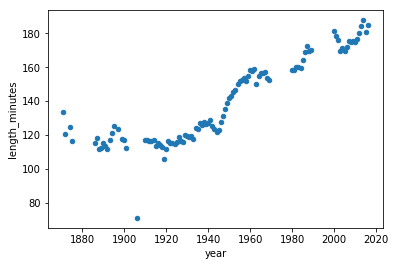

In [18]:
game_len = data_opt.pivot_table(index='year', values = 'length_minutes')
game_len.reset_index().plot.scatter('year','length_minutes')

### Summary

We've learned how pandas stores data using different types, and then we used that knowledge to reduce the memory usage of our pandas dataframe by almost 90%, just by using a few simple techniques:
1. Downcasting numberic columns to more efficient types
2. Converting string columns to the categorical type

### Processing Dataframes in Chunks

We need a different strategy for working with datasets that don't fit into memory even after we've optimized types and filtered columns. Instead of trying to load the full dataset into memory, we can load and process it in **Chunks**.

we'll explore how to break common tasks down so we can operate on chunks of the data set instead


![chunks](../Data/Notebook_images/chunks.png)

In [28]:
# create an iterator object to process each data chunk
chunk_iter = pd.read_csv("../Data/game_logs.csv", chunksize=100)

# Return memory usage(MB) for each columns
memory_footprints = []
num_row = 0
for chunk in chunk_iter:
    memory_footprints.append(chunk.memory_usage(deep=True).sum()/1024**2)
    num_row += len(chunk)

print(memory_footprints[1:5])
print(num_row)

[0.4956016540527344, 0.4927968978881836, 0.3443174362182617, 0.2363719940185547]
171907


In [25]:
chunk_iter = pd.read_csv("../Data/game_logs.csv", chunksize=100)

m = []
for i in chunk_iter:
    m.append(i.memory_usage(deep=True).sum()/1024**2)
m[1:10]

[0.4956016540527344,
 0.4927968978881836,
 0.3443174362182617,
 0.2363719940185547,
 0.4782896041870117,
 0.49718475341796875,
 0.40073680877685547,
 0.23879718780517578,
 0.23638916015625]